In [2]:
import tensorflow as tf
# import keras

In [3]:
tf.__version__

'2.6.0'

In [4]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models,layers
# from keras.utils import to_categorical
from tensorflow.keras import optimizers

In [5]:
# loading the dataset
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [6]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [7]:
labels=['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [72]:
#explore data
print(ytrain[9000])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


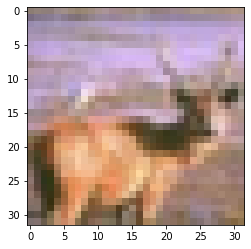

In [73]:
plt.imshow(xtrain[9000])
plt.show()

In [10]:
type(xtrain)

numpy.ndarray

In [11]:
xtrain.dtype  # datatype of the numbers contained in this numpy array !!

dtype('uint8')

In [12]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [14]:
a.astype('int8')

array([1, 2, 3], dtype=int8)

In [15]:
b = a*np.pi

In [16]:
b

array([3.14159265, 6.28318531, 9.42477796])

In [17]:
b.astype('int8')

array([3, 6, 9], dtype=int8)

In [18]:
# We are loosing precision (while computations) by keeping the data in a "lower"-bit (and too as a integer)

In [19]:
np.random.rand(5)   # one plane (line or series) of random numbers

array([0.08732011, 0.94985174, 0.7817083 , 0.10863927, 0.43094928])

In [20]:
np.random.rand(3,4)  # one plane 2D of random numbers  (3 rows & 4 col of random nos)

array([[0.41347409, 0.89494268, 0.65174877, 0.91914065],
       [0.40518654, 0.76814984, 0.60771895, 0.11825304],
       [0.44200805, 0.13943593, 0.39842871, 0.95806514]])

In [21]:
np.random.rand(3,4,5)   # we get 3 planes, each plane has 4 rows & 5 columns !!!

array([[[0.48015307, 0.43890467, 0.68498741, 0.57449433, 0.44542676],
        [0.84825724, 0.77340687, 0.03354904, 0.14419002, 0.74580365],
        [0.38404   , 0.4930027 , 0.09749464, 0.56381133, 0.47849648],
        [0.27902342, 0.87270076, 0.51862142, 0.8312677 , 0.87254448]],

       [[0.33354925, 0.96939255, 0.8312464 , 0.63092456, 0.37559423],
        [0.42591781, 0.76915834, 0.84710465, 0.52818396, 0.63180923],
        [0.5903982 , 0.58262086, 0.2129083 , 0.33941071, 0.07792862],
        [0.99588216, 0.95835439, 0.58619664, 0.06872297, 0.32337453]],

       [[0.20899556, 0.53679261, 0.65463326, 0.83866103, 0.75322346],
        [0.89028636, 0.04151537, 0.31069262, 0.82706114, 0.38916671],
        [0.77604801, 0.76090871, 0.30598026, 0.43652798, 0.98254311],
        [0.72332103, 0.40771297, 0.53809929, 0.54870793, 0.856277  ]]])

In [22]:
# convert the pixel values in float
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [23]:
0.3 - 0.2 - 0.1  # this is purely an artifact of loss of precision during floating-point calculation

-2.7755575615628914e-17

In [24]:
np.finfo(float).eps   # Any number smaller than eps is practically ZERO

2.220446049250313e-16

In [25]:
# scale the images
xtrain /= 255  # this is eqvalent to xtrain = xtrain/255 
xtest /= 255

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
ytrain[0]   # label for the 1st image

array([6], dtype=uint8)

In [28]:
#Convert the class vectors into binary class matrices
# basically One Hot Encoding of the labels (ytrain & ytest)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [29]:
ytrain[0]   # label for the 1st image  (for 1 images, its 1x10)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [30]:
ytrain.shape

(50000, 10)

In [31]:
ytest.shape

(10000, 10)

In [32]:
xtrain[0]  # effect of scaling .. all the pixel values are in the range of 0-1 !!!

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [33]:
# 0.2989 * R  +  0.5870 * G  +  0.1140 * B 

Red_plane = xtrain[0,:,:,0]  # 1st image, then all rows, all cols, 1st plane
Green_plane = xtrain[0,:,:,1]
Blue_plane = xtrain[0,:,:,2]

In [34]:
Red_plane.shape

(32, 32)

In [35]:
grayscale_img = 0.2989 *Red_plane  +  0.5870 *Green_plane  +  0.1140 *Blue_plane

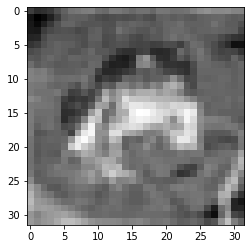

In [36]:
# grayscale_img = grayscale_img*255
# grayscale_img.astype('uint8')
plt.imshow(grayscale_img, cmap='gray')
plt.show()

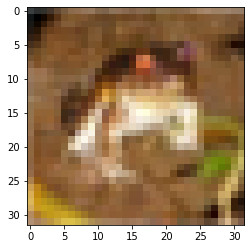

In [37]:
plt.imshow(xtrain[0])
plt.show()

(-153.55, 3224.55, 3.0, 267.0)

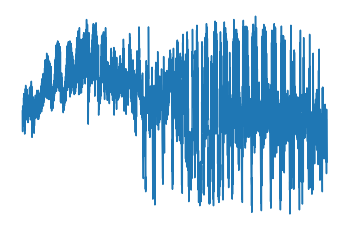

In [95]:
img1 = xtrain[9000].reshape(1,-1)
img1.shape   # THIS EXACTLY WHAT YOU HAVE FED TO THE DL MODEL FOR TRANING/LEARNING!!!!!!
img1 = img1*255
img1.astype('uint8')
px = list(range(3072))
plt.plot(px,img1[0])
plt.axis('off')

(-153.55, 3224.55, -12.75, 267.75)

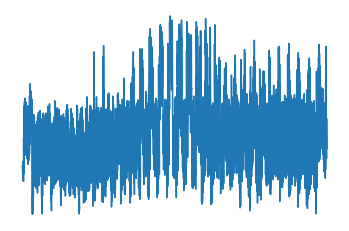

In [96]:
img1 = xtrain[0].reshape(1,-1)
img1.shape   # THIS EXACTLY WHAT YOU HAVE FED TO THE DL MODEL FOR TRANING/LEARNING!!!!!!
img1 = img1*255
img1.astype('uint8')
px = list(range(3072))
plt.plot(px,img1[0])
plt.axis('off')

In [38]:
32*32*3

3072

In [39]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [40]:
# MNIST dataset 28x28 = 782 pixels for each image
# We had reshaped each image into a row vector (i.e. single row with 784 columns)
# So each col represents a feature
# So essentially, our dataset had 784 features agianst every MNIST image


# For CIFAR-10 >>> 32,32,3 
# We'll have 3072 pixels values (features) against every image!!!

In [66]:
model = models.Sequential()  # create an empty model

model.add(layers.Flatten(input_shape = (32,32,3))) # reshapes into 1D vector (1,3072)

# kernel_regularizer='l2')) # Adding a hidden layer with 512 neurons, fully connected layer

model.add(layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'))  # 1st hidden layer
model.add(layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'))  # 2nd hidden layer

model.add(layers.Dense(10, activation='softmax'))  # output layer

In [67]:
model.summary()  # the i/p has 3072 nodes

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [68]:
3072*64 + 64

196672

In [69]:
64*32 + 32

2080

In [70]:
# Let's compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [71]:
history = model.fit(xtrain, ytrain, validation_split=0.2, verbose=True, epochs=50, batch_size=1000)

Epoch 1/50
40/40 [==============================] - 6s 135ms/step - loss: 2.1029 - accuracy: 0.2412 - val_loss: 1.9337 - val_accuracy: 0.3042
Epoch 2/50
40/40 [==============================] - 4s 112ms/step - loss: 1.8629 - accuracy: 0.3392 - val_loss: 1.8415 - val_accuracy: 0.3447
Epoch 3/50
40/40 [==============================] - 4s 102ms/step - loss: 1.7925 - accuracy: 0.3660 - val_loss: 1.7846 - val_accuracy: 0.3733
Epoch 4/50
40/40 [==============================] - 4s 103ms/step - loss: 1.7450 - accuracy: 0.3837 - val_loss: 1.7415 - val_accuracy: 0.3901
Epoch 5/50
40/40 [==============================] - 4s 99ms/step - loss: 1.6953 - accuracy: 0.4031 - val_loss: 1.7073 - val_accuracy: 0.3951
Epoch 6/50
40/40 [==============================] - 4s 97ms/step - loss: 1.6634 - accuracy: 0.4129 - val_loss: 1.7241 - val_accuracy: 0.3992
Epoch 7/50
40/40 [==============================] - 5s 115ms/step - loss: 1.6409 - accuracy: 0.4193 - val_loss: 1.6696 - val_accuracy: 0.4116
Epoch 8/

In [ ]:
Epoch 50/50
loss: 1.1882 - accuracy: 0.5825 - val_loss: 1.4757 - val_accuracy: 0.4956

Training batch size (no of training data points)= 0.8*50000 = 40,000

Batch_size (being used by the Mini-Batch Gradient Descent) = 1000

The weights are updated, after the error caculation is made for 1000 images (data-points)

jth Weight in the (k+1)th iteration

Wj_k+1 = Wj_k - (alpha*Grad_of_Loss_Fn)  >>>> This is your GD Update Rule !!

Grad_of_Loss_Fn = Sum(errors aginst 1000 images)

No. of iterations per epoch = Total no. of data points in the training or val set / batch_size

= 40,000/1000 = 40 iterations for training set (**50ms per epoch**)

= 10000/1000 = 10 iterations for validation set set

In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

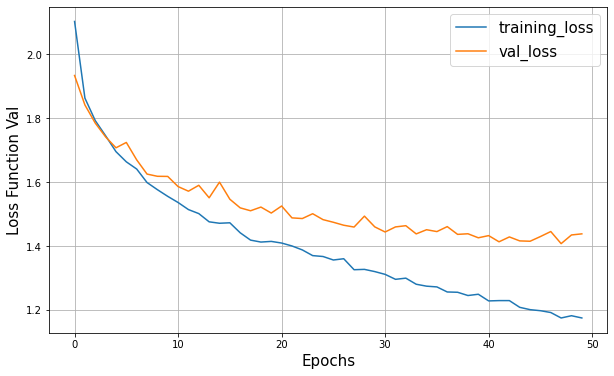

In [75]:
plt.figure(figsize=(10,6))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['training_loss', 'val_loss'], fontsize=15)

plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Function Val', fontsize=15)
plt.grid('on')
plt.show()

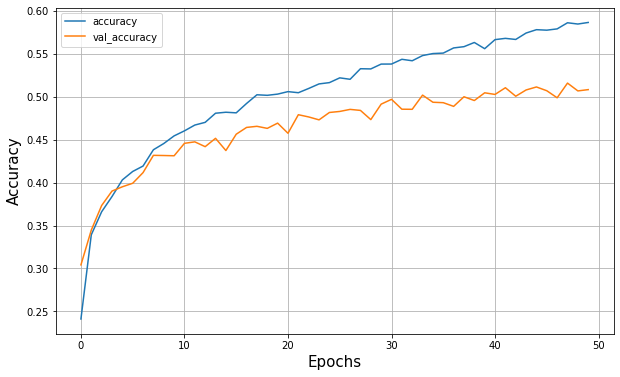

In [76]:
plt.figure(figsize=(10,6))
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid('on')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

In [97]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=xtrain.shape[1:], activation='relu', \
                        kernel_regularizer=None))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # extracting further features from the previous rectified FM !
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=None))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=None))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())  # it converts a 2D image (eg. 12,12) into a 1D vector (1,144)

model.add(layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'))  # 1st hidden layer
model.add(layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'))  # 2nd hidden layer

model.add(layers.Dense(10, activation='softmax'))  # output layer

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

In [99]:
# Let's compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
history = model.fit(xtrain, ytrain, validation_split=0.2, verbose=True, epochs=50, batch_size=1000)

Epoch 1/50
40/40 [==============================] - 65s 1s/step - loss: 2.0255 - accuracy: 0.2635 - val_loss: 1.8161 - val_accuracy: 0.3457
Epoch 2/50
40/40 [==============================] - 55s 1s/step - loss: 1.7055 - accuracy: 0.3879 - val_loss: 1.6035 - val_accuracy: 0.4222
Epoch 3/50
40/40 [==============================] - 54s 1s/step - loss: 1.5290 - accuracy: 0.4453 - val_loss: 1.4499 - val_accuracy: 0.4694
Epoch 4/50
40/40 [==============================] - 60s 2s/step - loss: 1.4462 - accuracy: 0.4796 - val_loss: 1.3672 - val_accuracy: 0.5065
Epoch 5/50
40/40 [==============================] - 66s 2s/step - loss: 1.3300 - accuracy: 0.5221 - val_loss: 1.2974 - val_accuracy: 0.5376
Epoch 6/50
40/40 [==============================] - 65s 2s/step - loss: 1.2503 - accuracy: 0.5525 - val_loss: 1.2611 - val_accuracy: 0.5543
Epoch 7/50
40/40 [==============================] - 64s 2s/step - loss: 1.1902 - accuracy: 0.5761 - val_loss: 1.1937 - val_accuracy: 0.5737
Epoch 8/50
40/40 [==